In [61]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [62]:
np.random.seed(0)
tf.random.set_seed(0)

In [63]:
df = pd.read_csv("/Volumes/1_TB_Robo/VSCode/Data Science/NLP/datasets/Tweets.csv")

In [64]:
# View the data

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


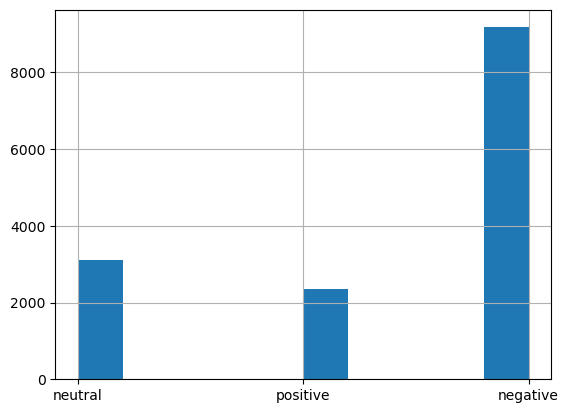

In [65]:
df = df[["airline_sentiment", "text"]]
df['airline_sentiment'].hist()

df = df[df["airline_sentiment"] != "Neutral"].copy()

In [66]:
# mapping data

target_mapping = {"positive" : 1, "negative" : 0} 
df["target"] = df["airline_sentiment"].map(target_mapping)

In [67]:
df_train, df_test = train_test_split(df, random_state=42)

# make the text into tfidf vectors

Vectorizer = TfidfVectorizer(max_features=2000)
X_train = Vectorizer.fit_transform(df_train['text'])
X_test = Vectorizer.transform(df_test['text'])

# data must not be a sparse matrix when being put into tensorflow

X_train = X_train.toarray()
X_test = X_test.toarray()

Y_train = df_train["target"]
Y_test = df_test["target"]

In [68]:
D = X_train.shape[1] # Input dimension

In [69]:
# Build the model

i = Input(shape=(D,))
x = LST
x = Dense(1)(i) 

model = Model(i, x)

In [70]:
model.compile(
    loss=BinaryCrossentropy(from_logits=True), # apply sigmoid with logits
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [71]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense_4 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [72]:

r = model.fit(X_train,
          Y_train,
          validation_data=(X_test, Y_test),              
          epochs=40,        
          batch_size=128
          )     
    

Epoch 1/40
 8/86 [=>............................] - ETA: 0s - loss: nan - accuracy: 0.6348 

2022-12-30 15:33:01.984917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.6228 - val_loss: nan - val_accuracy: 0.6393
Epoch 2/40
 1/86 [..............................] - ETA: 0s - loss: nan - accuracy: 0.6406

2022-12-30 15:33:02.798201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.6228 - val_loss: nan - val_accuracy: 0.6393
Epoch 3/40
86/86 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.6228 - val_loss: nan - val_accuracy: 0.6393
Epoch 4/40
86/86 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.6228 - val_loss: nan - val_accuracy: 0.6393
Epoch 5/40
86/86 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.6228 - val_loss: nan - val_accuracy: 0.6393
Epoch 6/40
86/86 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.6228 - val_loss: nan - val_accuracy: 0.6393
Epoch 7/40
86/86 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.6228 - val_loss: nan - val_accuracy: 0.6393
Epoch 8/40
86/86 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.6228 - val_loss: nan - val_accuracy: 0.6393
Epoch 9/40
86/86 [==============================] - 1s 7ms/step - loss: n

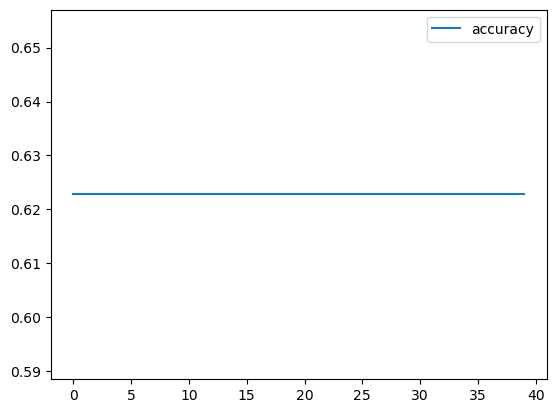

In [73]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.legend();